# Read data into Pandas DataFrame

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Survived  Pclass    <...>n\n[887 rows x 8 columns]
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


# Exploration of data in Pandas DataFrame
head, columns, describe, nunique, sample

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [6]:
cols = list(data.columns)
cols

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [8]:
data.sample(frac=0.01)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
319,0,3,Mr. Yoto Danoff,male,27.0,0,0,7.8958
147,0,2,Mr. Michel Navratil,male,36.5,0,2,26.0000
416,0,2,Mr. William John Matthews,male,30.0,0,0,13.0000
705,1,1,Miss. Alice Cleaver,female,22.0,0,0,151.5500
262,0,3,Miss. Delia Henry,female,21.0,0,0,7.7500
774,0,3,Mr. Thomas J Kilgannon,male,22.0,0,0,7.7375
233,0,2,Mr. Robert William Norman Leyson,male,24.0,0,0,10.5000
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
671,0,2,Mr. Ennis Hastings Watson,male,19.0,0,0,0.0000


In [9]:
data.nunique()

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

In [10]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Basic
Select column (Series), Create new columns

In [12]:
fare_column = data.Fare

In [13]:
also_fare_column = data['Fare']

In [15]:
a_list = fare_column.tolist()

In [17]:
a_list[0:10]

[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708]

# Slicing  


In [19]:
data.iloc[0,2]

'Mr. Owen Harris Braund'

In [21]:
data[["Fare","Age"]].iloc[0:10]

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
5,8.4583,27.0
6,51.8625,54.0
7,21.0750,2.0
8,11.1333,27.0
9,30.0708,14.0


# Filtering and Masks

In [23]:
mask = data['Fare'] > 100

In [25]:
high_fares = data[mask]

In [27]:
len(high_fares)

53

In [29]:
high_fares['Sex'].value_counts()

female    34
male      19
Name: Sex, dtype: int64

# Transforms 
Apply function to columns

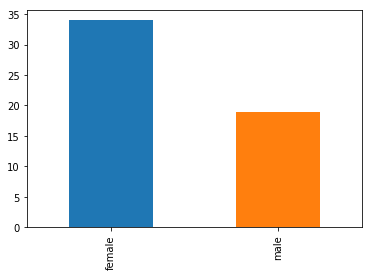

In [31]:
%matplotlib inline
high_fares['Sex'].value_counts().plot('bar')

In [33]:
data['fare_with_tax'] = data['Fare'].apply(lambda x: x*1.2)
data.head(1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,fare_with_tax
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.25,8.7


In [36]:
data['title'] = data['Name'].apply(lambda x: x.split(' ',1)[0])

In [37]:
data['title'].value_counts()

Mr.          513
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Mme.           1
Capt.          1
Sir.           1
Don.           1
Lady.          1
the            1
Ms.            1
Jonkheer.      1
Name: title, dtype: int64

In [39]:
tmp = data.groupby('title').mean()

In [40]:
tmp.sort_values('Fare')

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,fare_with_tax
title,,,,,,,
Jonkheer.,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000
Ms.,1.000000,2.000000,28.000000,0.000000,0.000000,13.000000,15.600000
Rev.,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,21.975000
Mr.,0.157895,2.405458,31.839181,0.290448,0.153996,24.556033,29.467240
Don.,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800,33.264960
Major.,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000,34.230000
Col.,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000,37.230000
Master.,0.575000,2.625000,4.641750,2.300000,1.375000,34.703125,41.643750
Lady.,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000,47.520000


# Plotting

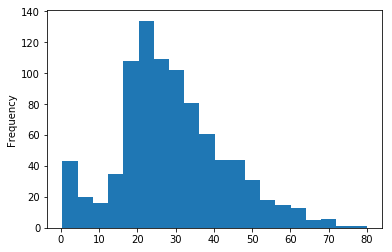

In [42]:
data.Age.plot('Hist',bins=20)

In [43]:
data_f = data[data.Sex == 'female']

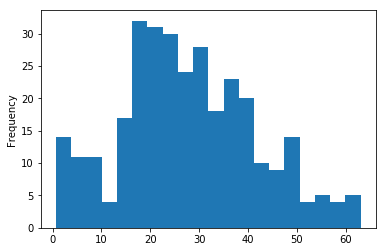

In [45]:
data_f.Age.plot('Hist',bins=20)

Text(0,0.5,'Age (yrs)')

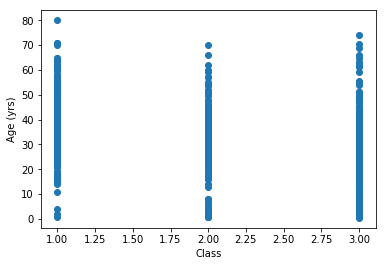

In [48]:
import matplotlib.pyplot as plt
plt.scatter(data['Pclass'],data['Age'])
plt.xlabel('Class')
plt.ylabel('Age (yrs)')